## Project
### Constance Streitman (2253221)

In [1]:
import pandas as pd
from pathlib import Path

data_dir = Path(
    r"C:\Users\Constance\Documents\foar skuul frum kani\sem 3 - uh fall 2025\data mining (ds1)\dblp-project"
)

json_files = sorted(data_dir.glob("dblp-ref-*.json"))
print(json_files)   # sanity check

dfs = []
for f in json_files:
    print("Loading", f.name)
    df_part = pd.read_json(f, lines=True)  # full file
    dfs.append(df_part)

dblp = pd.concat(dfs, ignore_index=True)

print(dblp.shape)
dblp.head()

[WindowsPath('C:/Users/Constance/Documents/foar skuul frum kani/sem 3 - uh fall 2025/data mining (ds1)/dblp-project/dblp-ref-0.json'), WindowsPath('C:/Users/Constance/Documents/foar skuul frum kani/sem 3 - uh fall 2025/data mining (ds1)/dblp-project/dblp-ref-1.json'), WindowsPath('C:/Users/Constance/Documents/foar skuul frum kani/sem 3 - uh fall 2025/data mining (ds1)/dblp-project/dblp-ref-2.json'), WindowsPath('C:/Users/Constance/Documents/foar skuul frum kani/sem 3 - uh fall 2025/data mining (ds1)/dblp-project/dblp-ref-3.json')]
Loading dblp-ref-0.json
Loading dblp-ref-1.json
Loading dblp-ref-2.json
Loading dblp-ref-3.json
(3079007, 8)


,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266


simplifying the dataset a little

In [2]:
needed_cols = [
    "id",          #str
    "title",       #str
    "authors",     #list of str
    "venue",       #str
    "year",        #int
    "n_citation",  #int
    "references",  #list of str
    "abstract"     #str
]
dblp = dblp[[c for c in needed_cols if c in dblp.columns]].copy()
dblp.head()

,id,title,authors,venue,year,n_citation,references,abstract
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",international conference on human-computer int...,2013,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",The purpose of this study is to develop a lear...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,"[Gareth Beale, Graeme Earl]",visual analytics science and technology,2011,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",This paper describes the design and implementa...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...","[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",pattern recognition and machine intelligence,2009,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...",This article applied GARCH model instead AR or...
3,00338203-9eb3-40c5-9f31-cbac73a519ec,Development of Remote Monitoring and Control D...,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",,2011,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",NaN
4,0040b022-1472-4f70-a753-74832df65266,Reasonig about Set-Oriented Methods in Object ...,"[Giovanna Guerrini, Isabella Merlo]",,1998,2,NaN,NaN


getting rid of some things with unnecessary NAs, cleaning up, whatever

In [3]:
dblp = dblp.dropna(subset=["id", "title"])

dblp["n_citation"] = pd.to_numeric(dblp["n_citation"], errors="coerce").fillna(0)
dblp["n_citation"] = dblp["n_citation"].astype("int32")

def fix_authors(a):
    if isinstance(a, list):
        return [str(x).strip() for x in a if str(x).strip()]
    if pd.isna(a):
        return []
    return [str(a).strip()]

dblp["authors"] = dblp["authors"].apply(fix_authors)

dblp["n_authors"] = dblp["authors"].apply(len)

def fix_refs(r):
    if isinstance(r, list):
        return [str(x).strip() for x in r if str(x).strip()]
    if pd.isna(r):
        return []
    return [str(r).strip()]

dblp["references"] = dblp["references"].apply(fix_refs)
dblp["n_references"] = dblp["references"].apply(len)

In [4]:
dblp["text"] = (dblp["title"] + " " + dblp["abstract"]).str.lower()
dblp.head()

,id,title,authors,venue,year,n_citation,references,abstract,n_authors,n_references,text
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",international conference on human-computer int...,2013,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",The purpose of this study is to develop a lear...,8,2,preliminary design of a network protocol learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,"[Gareth Beale, Graeme Earl]",visual analytics science and technology,2011,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",This paper describes the design and implementa...,2,13,a methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...","[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",pattern recognition and machine intelligence,2009,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...",This article applied GARCH model instead AR or...,4,2,"comparison of garch, neural network and suppor..."
3,00338203-9eb3-40c5-9f31-cbac73a519ec,Development of Remote Monitoring and Control D...,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",,2011,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",NaN,5,2,NaN
4,0040b022-1472-4f70-a753-74832df65266,Reasonig about Set-Oriented Methods in Object ...,"[Giovanna Guerrini, Isabella Merlo]",,1998,2,[],NaN,2,0,NaN


In [5]:
print("Before:", dblp.shape)
dblp = dblp.dropna(subset=["abstract", "text"]) #dropping everything with NaN
print("After:", dblp.shape)
dblp.head()

Before: (3079007, 11)
After: (2548532, 11)


,id,title,authors,venue,year,n_citation,references,abstract,n_authors,n_references,text
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",international conference on human-computer int...,2013,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",The purpose of this study is to develop a lear...,8,2,preliminary design of a network protocol learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,"[Gareth Beale, Graeme Earl]",visual analytics science and technology,2011,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",This paper describes the design and implementa...,2,13,a methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...","[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",pattern recognition and machine intelligence,2009,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...",This article applied GARCH model instead AR or...,4,2,"comparison of garch, neural network and suppor..."
10,00a119c4-d367-4607-b3c8-b237f2971bff,Identifying Psychological Theme Words from Emo...,"[Ankita Brahmachari, Priya Singh, Avdhesh Garg...",,2013,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Recent achievements in Natural Language Proces...,4,3,identifying psychological theme words from emo...
12,00bcf2d5-1592-46b0-81fd-933f90b5ecca,Multisymplectic Spectral Methods for the Gross...,"[Alvaro L. Islas, Constance M. Schober]",international conference on conceptual structures,2002,50,[],"Recently, Bridges and Reich introduced the con...",2,0,multisymplectic spectral methods for the gross...


In [6]:
dblp = dblp.drop(columns=["id", "references"], errors="ignore")
dblp.head()

,title,authors,venue,year,n_citation,abstract,n_authors,n_references,text
0,Preliminary Design of a Network Protocol Learn...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",international conference on human-computer int...,2013,0,The purpose of this study is to develop a lear...,8,2,preliminary design of a network protocol learn...
1,A methodology for the physically accurate visu...,"[Gareth Beale, Graeme Earl]",visual analytics science and technology,2011,50,This paper describes the design and implementa...,2,13,a methodology for the physically accurate visu...
2,"Comparison of GARCH, Neural Network and Suppor...","[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",pattern recognition and machine intelligence,2009,50,This article applied GARCH model instead AR or...,4,2,"comparison of garch, neural network and suppor..."
10,Identifying Psychological Theme Words from Emo...,"[Ankita Brahmachari, Priya Singh, Avdhesh Garg...",,2013,0,Recent achievements in Natural Language Proces...,4,3,identifying psychological theme words from emo...
12,Multisymplectic Spectral Methods for the Gross...,"[Alvaro L. Islas, Constance M. Schober]",international conference on conceptual structures,2002,50,"Recently, Bridges and Reich introduced the con...",2,0,multisymplectic spectral methods for the gross...


# TASK #1: EXPLORATORY DATA ANALYSIS

In [7]:
print("Total papers:", len(dblp))

ppy = dblp.groupby("year").size().rename("paper_count")
ppy.head(), ppy.tail()

Total papers: 2548532


(year
 1949     1
 1950     2
 1951     2
 1952     7
 1953    21
 Name: paper_count, dtype: int64,
 year
 2014    169248
 2015    188143
 2016    185342
 2017     56552
 2018         4
 Name: paper_count, dtype: int64)

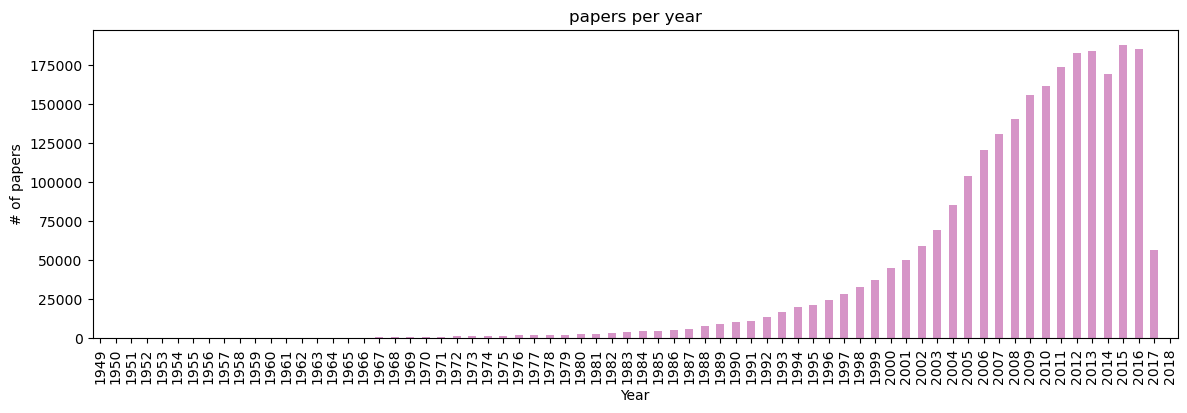

In [8]:
import matplotlib.pyplot as plt

ppy.plot(kind="bar", figsize=(14,4), color="#d695c7")
plt.xlabel("Year")
plt.ylabel("# of papers")
plt.title("papers per year")
plt.show()

In [9]:
popvenues = (
    dblp.groupby("venue")["n_citation"]
        .agg(["count", "mean", "median"])
        .sort_values("count", ascending=False)
)

popvenues.head(20)

,count,mean,median
venue,,,
,311564,22.746258,3.0
Lecture Notes in Computer Science,30429,31.546189,13.0
"international conference on acoustics, speech, and signal processing",26086,30.365407,21.0
international conference on robotics and automation,18562,52.867902,50.0
international conference on image processing,17417,31.219843,19.0
international conference on communications,16447,26.832857,11.0
international symposium on circuits and systems,16177,23.009891,9.0
global communications conference,15763,27.083994,13.0
intelligent robots and systems,14069,31.646599,21.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

samplesubset = (dblp["text"].sample(200_000, random_state=2253221)) ##### used subset so it didnt take forever

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    min_df=50,
    max_df = 0.4,
    ngram_range=(1, 2)
)
X = tfidf.fit_transform(samplesubset)

terms = tfidf.get_feature_names_out()
mean_tfidf = X.mean(axis=0).A1  #to make it percapita

term_scores = (
    pd.DataFrame({"term": terms, "score": mean_tfidf})
      .sort_values("score", ascending=False)
)

boiler_phrases = {
    "paper presents",
    "paper present",
    "paper proposes",
    "paper propose",
    "paper describes",
    "proposed method",
    "proposed approach",
    "proposed algorithm",
    "experimental results",
    "propose new",
    "state art",
    "real world",
    "case study",
    "ad hoc",
    "et al",
}

term_scores = term_scores[~term_scores["term"].isin(boiler_phrases)]

bigrams = term_scores[term_scores["term"].str.contains(" ")]
bigrams.head(30)

,term,score
3715,real time,0.004500
4198,simulation results,0.002596
2450,large scale,0.002336
2959,neural network,0.002335
4100,sensor networks,0.001949
2960,neural networks,0.001891
4961,wireless sensor,0.001698
1155,decision making,0.001596
2807,model based,0.001580
2063,high level,0.001456


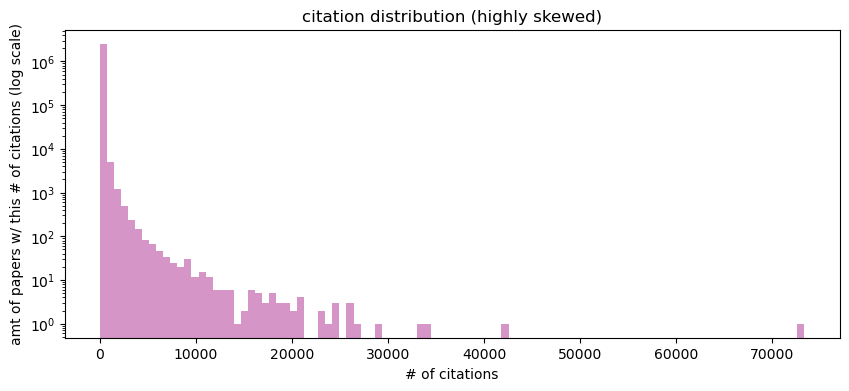

In [11]:
dblp["n_citation"].describe()
plt.figure(figsize=(10,4))
plt.hist(dblp["n_citation"], bins=100, log=True, color="#d695c7")
plt.xlabel("# of citations")
plt.ylabel("amt of papers w/ this # of citations (log scale)")
plt.title("citation distribution (highly skewed)")
plt.show()

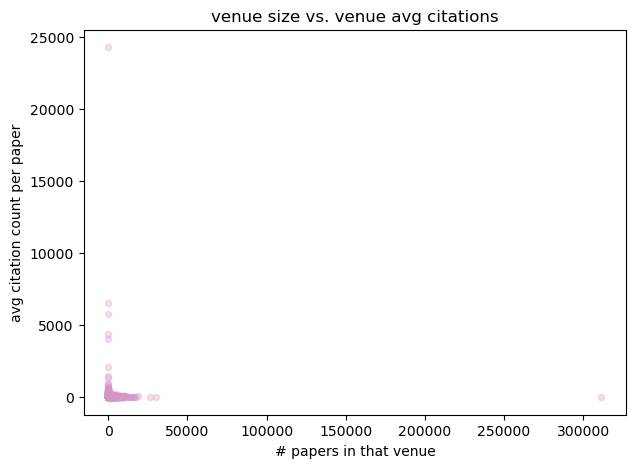

In [12]:
venuebycit = (
    dblp.groupby("venue")["n_citation"]
        .agg(
            **{
                "# papers in that venue": "count",
                "avg citation count per paper": "mean",
            }
        )
)

venuebycit.plot.scatter(
    x="# papers in that venue",
    y="avg citation count per paper",
    alpha=0.3,
    figsize=(7, 5),
    color="#d695c7"
)
plt.title("venue size vs. venue avg citations")
plt.xlabel("# papers in that venue")
plt.ylabel("avg citation count per paper")
plt.show()


<Axes: xlabel='year'>

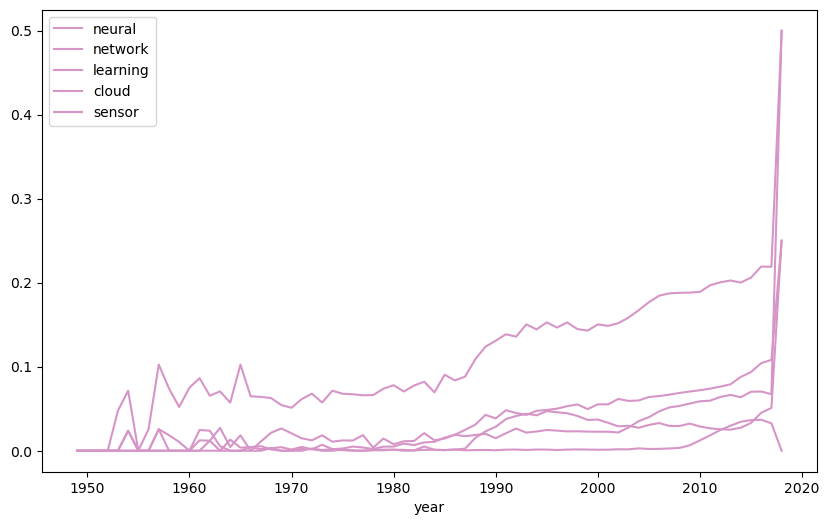

In [13]:
keywords = ["neural", "network", "learning", "cloud", "sensor"]

trend_df = pd.DataFrame({
    kw: dblp["text"].str.contains(kw).groupby(dblp["year"]).mean()
    for kw in keywords
})

trend_df.plot(figsize=(10,6), color="#d695c7")

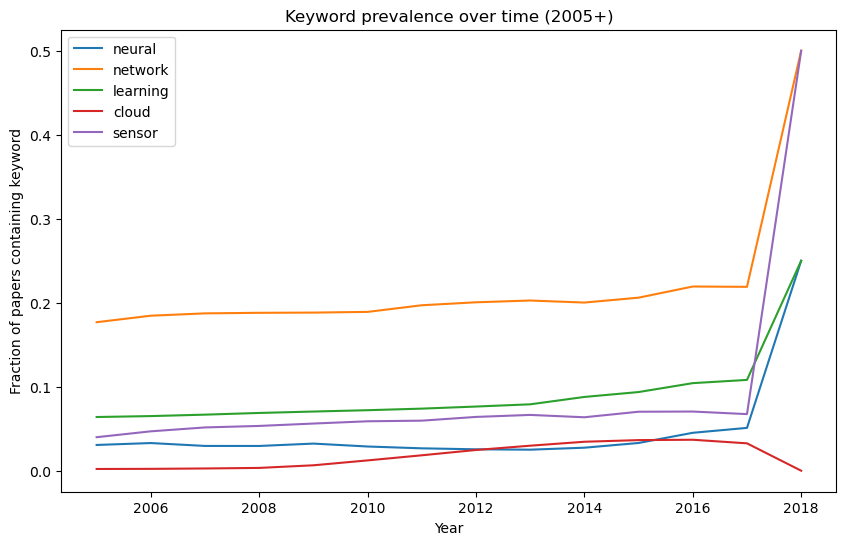

In [ ]:
keywords = ["neural", "network", "learning", "cloud", "sensor"]

dblp_2005 = dblp[dblp["year"] >= 2005].copy()

trend_df = pd.DataFrame({
    kw: dblp_2005["text"]
            .str.contains(kw)
            .groupby(dblp_2005["year"])
            .mean()
    for kw in keywords
})

trend_df.plot(figsize=(10, 6))
plt.title("Keyword prevalence over time (2005+)")
plt.xlabel("Year")
plt.ylabel("Fraction of papers containing keyword")
plt.show()

#same thing but after 2005 only

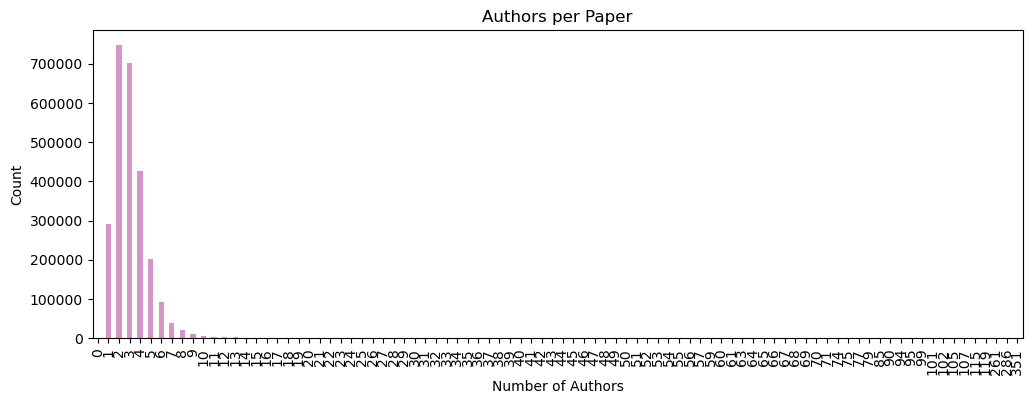

In [15]:
dblp["n_authors"].value_counts().sort_index().plot(kind="bar", figsize=(12,4), color="#d695c7")
plt.title("Authors per Paper")
plt.xlabel("Number of Authors")
plt.ylabel("Count")
plt.show()

In [16]:
from collections import Counter

author_counts = Counter(a for lst in dblp["authors"] for a in lst)
pd.DataFrame(author_counts.most_common(20), columns=["author", "papers"])

#probbaly due to them having the same name, not because the chinese are dominating like that
#note  that Lajos HAnzo was EIC of IEEE, which is why he's on there despite being the only Lajos Hanzo

,author,papers
0,Wei Wang,2261
1,Wei Zhang,1497
2,Lei Zhang,1438
3,Yang Liu,1346
4,Wei Li,1307
5,Jun Wang,1225
6,Lei Wang,1215
7,Jun Zhang,1147
8,Wei Liu,1057
9,Li Zhang,1019


## TASK #2: CITATION ANOMALY DETECTION

In [ ]:
import numpy as np
import pandas as pd

dblp_anom = dblp.dropna(subset=["venue"]).copy()


venue_stats_anom = (
    dblp_anom
    .groupby("venue")["n_citation"]
    .agg(["count", "mean", "std"])
    .reset_index()
)

min_papers_per_venue = 75 
venue_stats_anom = venue_stats_anom[venue_stats_anom["count"] >= min_papers_per_venue]

#labeling as prestigious or unprestigious
q25 = venue_stats_anom["mean"].quantile(0.25)
q75 = venue_stats_anom["mean"].quantile(0.75)

def label_prestige(m):
    if m >= q75:
        return "prestigious"
    elif m <= q25:
        return "unprestigious"
    else:
        return "middle"

venue_stats_anom["prestige"] = venue_stats_anom["mean"].apply(label_prestige)

dblp_v = dblp_anom.merge(
    venue_stats_anom[["venue", "count", "mean", "std", "prestige"]],
    on="venue",
    how="inner"   # only venues that passed the count filter
)

#z-score of each paper's citations within its venue
dblp_v["std"] = dblp_v["std"].replace(0, np.nan)  # avoid divide by 0
dblp_v["z_citation"] = (dblp_v["n_citation"] - dblp_v["mean"]) / dblp_v["std"]


#defining low and high
prestigious_low = (
    dblp_v[
        (dblp_v["prestige"] == "prestigious") &
        (dblp_v["z_citation"] <= -2.5) 
    ]
    .sort_values("z_citation")  
)

prestigious_low[
    ["venue", "year", "title", "n_citation", "mean", "z_citation"]
].head(20)


unprestigious_high = (
    dblp_v[
        (dblp_v["prestige"] == "unprestigious") &
        (dblp_v["z_citation"] >= 2.5) 
    ]
    .sort_values("z_citation", ascending=False)
)

unprestigious_high[
    ["venue", "year", "title", "n_citation", "mean", "z_citation"]
].head(20)

prestigious_low["anomaly_type"] = "prestigious venue, low citation"
unprestigious_high["anomaly_type"] = "unprestigious venue, high citation"

all_anomalies = pd.concat([prestigious_low, unprestigious_high], ignore_index=True)

all_anomalies[
    ["anomaly_type", "venue", "year", "title", "n_citation", "mean", "z_citation"]
].head(50)

,anomaly_type,venue,year,title,n_citation,mean,z_citation
0,"unprestigious venue, high citation",arXiv: Networking and Internet Architecture,1998,A Quantitative Measure Of Fairness And Discrim...,3525,13.846186,46.234605
1,"unprestigious venue, high citation",Proceedings of SPIE,1993,The QBIC Project : Querying Images by Content ...,2175,14.884671,40.628973
2,"unprestigious venue, high citation",Proceedings of SPIE,1995,Similarity of color images,2116,14.884671,39.519260
3,"unprestigious venue, high citation",IEEE Access,2013,Millimeter Wave Mobile Communications for 5G C...,2231,10.963959,39.088375
4,"unprestigious venue, high citation",arXiv: Information Theory,2007,Physical Layer Network Coding,1066,13.508475,38.004527
5,"unprestigious venue, high citation",high performance computing and communications,2008,"Market-Oriented Cloud Computing: Vision, Hype,...",2685,16.703358,37.080692
6,"unprestigious venue, high citation",Wireless Personal Communications,1997,Associativity-Based Routing for Ad Hoc Mobile ...,1298,18.720531,37.077224
7,"unprestigious venue, high citation",computational intelligence and security,2009,A detailed analysis of the KDD CUP 99 data set,1216,14.310506,36.080048
8,"unprestigious venue, high citation",computational science and engineering,1996,Artificial neural networks: a tutorial,1806,18.471740,35.014356
9,"unprestigious venue, high citation","arXiv: Distributed, Parallel, and Cluster Comp...",2016,TensorFlow: Large-Scale Machine Learning on He...,2450,15.211284,32.793047


In [18]:
import numpy as np
import pandas as pd

dblp_cleaned = dblp.dropna(subset=["venue"]).copy()
dblp_cleaned["log_citations"] = np.log1p(dblp_cleaned["n_citation"])
#transforming to account for how massively skewed citations are so we can run Z score, find anomalies

venuedeets = (
    dblp_cleaned.groupby("venue")["log_citations"]
    .agg(venue_count=("count"), venue_log_mean=("mean"), venue_log_std=("std"))
    .reset_index()
)

min_papers = 75
venuedeets = venuedeets[venuedeets["venue_count"] >= min_papers].copy()

percentile50 = venuedeets["venue_log_mean"].quantile(0.50)
percentile85 = venuedeets["venue_log_mean"].quantile(0.85)

def get_prestige_label(val):
    if val <= percentile50: 
            return "unprestigious"
    if val >= percentile85: 
            return "prestigious"
    return "middle"

venuedeets["prestige_level"] = venuedeets["venue_log_mean"].apply(get_prestige_label)

paperswdeets = dblp_cleaned.merge(venuedeets, on="venue", how="inner")

paperswdeets["z_score"] = (
    (paperswdeets["log_citations"] - paperswdeets["venue_log_mean"]) 
    / paperswdeets["venue_log_std"].replace(0, np.nan)        #avoiding dividing by 0 if sd is 0 wrt finding Z score
)


#identifying anomalies now, epicly
is_prest_low = (paperswdeets["prestige_level"] == "prestigious") & (paperswdeets["z_score"] <= -2.5)
is_unprest_high = (paperswdeets["prestige_level"] == "unprestigious") & (paperswdeets["z_score"] >= 2.5)

anomalies = paperswdeets[is_prest_low | is_unprest_high].copy()
anomalies["anomaly_type"] = np.where(
    anomalies["z_score"] > 0, 
    "unprestigious venue but high citations", 
    "prestigious venue but low citations"
)

anomalies["|Z|"] = anomalies["z_score"].abs()
final_view = anomalies.sort_values("|Z|", ascending=False)
cols_to_show = ["anomaly_type", "venue", "year", "title", "n_citation", "z_score"]
final_view[cols_to_show].head(20)

,anomaly_type,venue,year,title,n_citation,z_score
343324,unprestigious venue but high citations,,1989,"Genetic Algorithms in Search, Optimization and...",73362,5.580289
1175386,prestigious venue but low citations,non-photorealistic animation and rendering,2009,Semiregular patterns on surfaces,0,-5.419102
1480583,unprestigious venue but high citations,,1999,Ad-hoc on-demand distance vector routing,26357,4.970239
1781938,unprestigious venue but high citations,Datenschutz Und Datensicherheit,2002,Impact of artificial gummy fingers on fingerpr...,819,4.784723
349699,unprestigious venue but high citations,,1996,Handbook of Applied Cryptography,18201,4.749592
1891286,unprestigious venue but high citations,,1992,Genetic algorithms + data structures=evolution...,18006,4.743173
1988984,prestigious venue but low citations,computer security foundations workshop,1996,Action systems for security specification,0,-4.669023
276361,unprestigious venue but high citations,,1992,Genetic programming: on the programming of com...,15096,4.638127
116824,prestigious venue but low citations,eurographics symposium on rendering techniques,2007,Global illumination for the masses,0,-4.588400
241057,prestigious venue but low citations,eurographics symposium on rendering techniques,1999,Disruptive technologies in computer graphics: ...,0,-4.588400


**analysis here**
I identified a data quality issue where X number of records had empty strings for venues. Upon inspection, these appeared to be Books or standalone works.

Also, the fact that some of these papers have 0 citations is very suspicious. I suspect it's an error on part of the dataset. However, the 'Unprestigious High' anomalies (like 'Genetic Algorithms') were verified as actual high-impact papers



In [ ]:
#here we run things for |z| > 2.5 to see if anomalous stuff has different TF IDF key terms than the whole population

if "text" not in dblp.columns:
    dblp["text"] = dblp["title"].fillna("") + " " + dblp["abstract"].fillna("")

#Merging. We use suffixes to prevent the "text_x" / "text_y" error if ran multiple times
anomalies_with_text = anomalies.merge(
    dblp[["text"]], 
    left_index=True, 
    right_index=True, 
    how="inner",
    suffixes=("", "_new") # If text exists, the new one gets a suffix
)

#handle cases where the merge created a duplicate column
if "text_new" in anomalies_with_text.columns:
    anomalies_with_text["text"] = anomalies_with_text["text_new"]

#transform using the existing tfidf model
X_anom = tfidf.transform(anomalies_with_text["text"])
mean_tfidf_anom = X_anom.mean(axis=0).A1

#compare
comparison = pd.DataFrame({
    "term": terms,
    "general_score": mean_tfidf,       
    "anomaly_score": mean_tfidf_anom   
})

comparison["diff"] = comparison["anomaly_score"] - comparison["general_score"]
comparison = comparison[~comparison["term"].isin(boiler_phrases)]
bigrams_comp = comparison[comparison["term"].str.contains(" ")]

top_anomaly_terms = bigrams_comp.sort_values("diff", ascending=False).head(20)

print("\nTop Terms distinguishing Anomalies from the Rest:")
print(top_anomaly_terms[["term", "diff", "anomaly_score", "general_score"]].to_string(index=False))


Top Terms distinguishing Anomalies from the Rest:
               term     diff  anomaly_score  general_score
     network coding 0.000425       0.000894       0.000469
    object oriented 0.000419       0.001513       0.001094
 simulation results 0.000418       0.003015       0.002596
       video coding 0.000404       0.000907       0.000503
  fourier transform 0.000403       0.000871       0.000469
     linear systems 0.000359       0.000902       0.000543
       time varying 0.000354       0.001444       0.001089
       base station 0.000349       0.000908       0.000558
information systems 0.000321       0.001443       0.001122
     based approach 0.000314       0.001547       0.001234
 paper investigates 0.000290       0.000949       0.000660
      content based 0.000285       0.000840       0.000555
resource management 0.000269       0.000703       0.000434
boundary conditions 0.000258       0.000629       0.000371
          multi hop 0.000249       0.000724       0.000475
   em

C:\Users\Constance\AppData\Local\Temp\ipykernel_5464\3582927357.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=viz_data, x="diff", y="term", palette="Spectral")


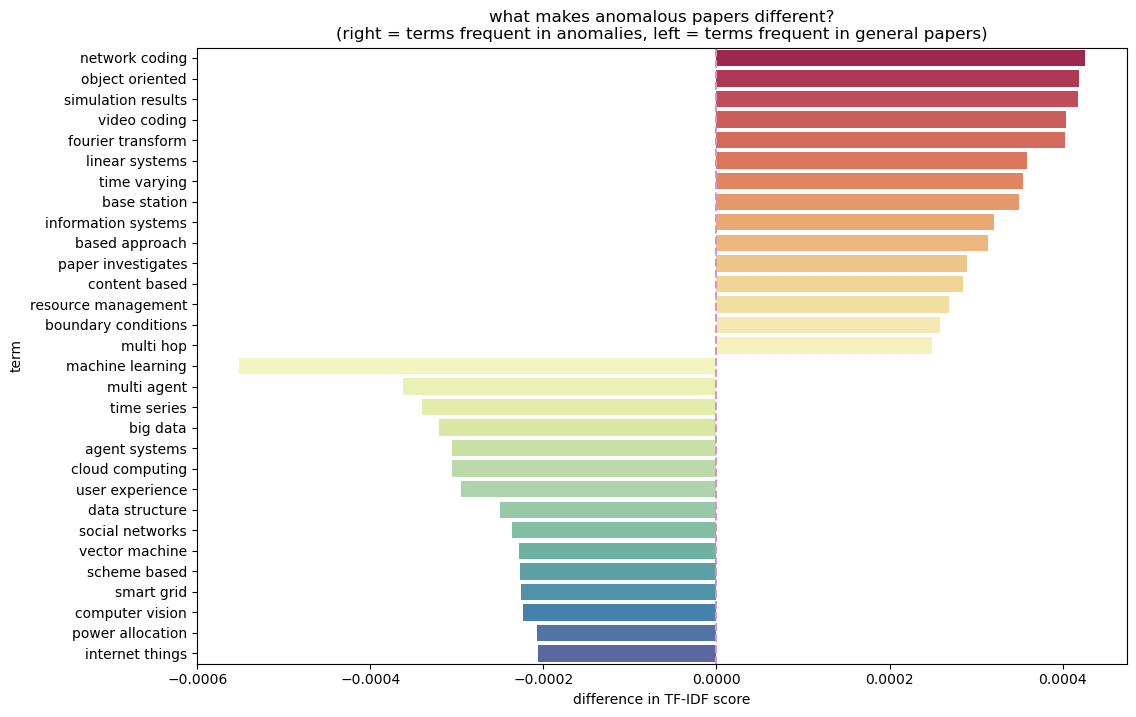

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#prepping w/ top 10 terms unique to anomalies (positive diff) + bottom 10 terms typical of normal papers (negative diff)
top_15 = bigrams_comp.sort_values("diff", ascending=False).head(15)
bot_15 = bigrams_comp.sort_values("diff", ascending=True).head(15)
viz_data = pd.concat([top_15, bot_15])

plt.figure(figsize=(12, 8))
sns.barplot(data=viz_data, x="diff", y="term", palette="Spectral")

plt.title("what makes anomalous papers different?\n(right = terms frequent in anomalies, left = terms frequent in general papers)")
plt.xlabel("difference in TF-IDF score")
plt.axvline(0, color="#d695c7", linestyle="--")
plt.show()

**comments and analysis**: machine learning being non-anomalous is both surprising and unsurprising. I suppose that since it's a hot topic, journals are picking it up, and it's likely to be "misplaced" into a journal of the wrong caliber conpared to more obscure/rigorous fields like fourier transforms

# TASK #3: Temporal Topic Analysis

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

dblp_temporal = dblp[dblp["year"] >= 1990]

samplesubset = (
    dblp_temporal
    .sample(200_000, random_state=2253221) 
    .copy()
)

sample_text = samplesubset["text"].astype(str)
sample_year = samplesubset["year"].to_numpy()

tfidf_topics = TfidfVectorizer(
    max_features=5000,
    stop_words="english", 
    min_df=50,
    max_df=0.4,
    ngram_range=(1, 2),
)

X_topics = tfidf_topics.fit_transform(sample_text)   #sparse mat
terms_topics = tfidf_topics.get_feature_names_out()

print("Shape:", X_topics.shape) 
print("Example years:", sample_year[:10])
print("Example terms:", terms_topics[:10])


Shape: (200000, 5000)
Example years: [2006 1999 2004 2005 2005 2010 2004 2016 2010 1997]
Example terms: ['000' '10' '100' '11' '12' '13' '14' '15' '16' '17']


In [22]:
#manually making terms for topics to put in the time series graph thingy
topic_terms = {
    "Deep/Neural Learning": [
        "neural network", "neural networks",
        "deep learning", "convolutional neural",
        "recurrent neural",
    ],
    "Classical ML / SVM": [
        "support vector", "svm classifier",
        "kernel method", "kernel function",
    ],
    "Vision & Recognition": [
        "image segmentation", "object detection",
        "image classification", "face recognition",
    ],
    "Web & Semantic Web": [
        "semantic web", "web services",
        "linked data", "web mining",
        "information retrieval",
    ],
    "Sensor / Ad-hoc Networks": [
        "sensor networks", "wireless sensor",
        "ad hoc network", "routing protocol",
    ],
    "Cloud / Distributed": [
        "cloud computing", "grid computing",
        "map reduce", "distributed system",
    ],
    "Security & Crypto": [
        "access control", "authentication protocol",
        "public key", "cryptographic",
    ],
    "Data Mining & Recommenders": [
        "data mining", "frequent pattern",
        "association rules", "recommender system",
    ],
    "Optimization / RL": [
        "reinforcement learning", "dynamic programming",
        "model predictive", "control system",
    ],
    "NLP / Text": [
        "language model", "machine translation",
        "text classification",
    ],
    "Time Series & Forecasting": [
        "time series", "financial time", "stock market",
    ],
    "AI Alignment / Safety": [
        "alignment", "value alignment", "ai safety",
    ],
}

In [ ]:
import numpy as np
import pandas as pd

#term -> col index in X_topics
term_to_idx = {t: i for i, t in enumerate(terms_topics)}

topic_to_cols = {}
for topic, lex in topic_terms.items():
    cols = [term_to_idx[w] for w in lex if w in term_to_idx]
    if cols: 
        topic_to_cols[topic] = cols

topic_to_cols  #just to eyeball what survived


{'Deep/Neural Learning': [2959, 2960],
 'Classical ML / SVM': [4478],
 'Vision & Recognition': [2155, 3024, 1722],
 'Web & Semantic Web': [4090, 4931, 2256],
 'Sensor / Ad-hoc Networks': [4105, 4962, 3974],
 'Cloud / Distributed': [729],
 'Security & Crypto': [83, 3625, 1083],
 'Data Mining & Recommenders': [1125, 370],
 'Optimization / RL': [3810, 1426],
 'Time Series & Forecasting': [4622],
 'AI Alignment / Safety': [223]}

In [ ]:
years = sample_year
years_unique = np.sort(np.unique(years))

rows_by_year = {y: np.where(years == y)[0] for y in years_unique}

topic_scores = []  

for topic, cols in topic_to_cols.items():
    cols = np.array(cols)
    for y in years_unique:
        rows = rows_by_year[y]
        if len(rows) == 0:
            continue
        
        sub = X_topics[rows][:, cols] 
        
        #per-capita: total TF-IDF for A topic in B yr / #docs B yr
        score = sub.sum() / len(rows)
        
        topic_scores.append({
            "topic": topic,
            "year": int(y),
            "score": float(score),
        })

topic_df = pd.DataFrame(topic_scores)
topic_df

,topic,year,score
0,Deep/Neural Learning,1990,0.003824
1,Deep/Neural Learning,1991,0.004716
2,Deep/Neural Learning,1992,0.006864
3,Deep/Neural Learning,1993,0.009908
4,Deep/Neural Learning,1994,0.005848
...,...,...,...
314,AI Alignment / Safety,2014,0.001470
315,AI Alignment / Safety,2015,0.001537
316,AI Alignment / Safety,2016,0.001212
317,AI Alignment / Safety,2017,0.000815


In [25]:
topic_pivot = (
    topic_df
    .pivot(index="year", columns="topic", values="score")
    .fillna(0)
)

# focus on more recent years if you like
topic_pivot = topic_pivot[topic_pivot.index >= 2000]
topic_pivot = topic_pivot[topic_pivot.index != 2018]


topic_pivot.head(20)

topic,AI Alignment / Safety,Classical ML / SVM,Cloud / Distributed,Data Mining & Recommenders,Deep/Neural Learning,Optimization / RL,Security & Crypto,Sensor / Ad-hoc Networks,Time Series & Forecasting,Vision & Recognition,Web & Semantic Web
year,,,,,,,,,,,
2000,0.000870,0.000511,0.000000,0.002516,0.004577,0.001179,0.002713,0.000182,0.000950,0.000855,0.001214
2001,0.001180,0.000730,0.000000,0.002078,0.006028,0.000881,0.001869,0.000586,0.001703,0.000751,0.001590
2002,0.000881,0.000818,0.000000,0.002322,0.004414,0.000803,0.001882,0.000907,0.000709,0.001915,0.002058
2003,0.001564,0.000891,0.000000,0.002007,0.004215,0.001136,0.002515,0.001181,0.000920,0.001595,0.004118
2004,0.002056,0.001082,0.000000,0.002537,0.003239,0.001081,0.002583,0.002950,0.001008,0.001620,0.004813
2005,0.001566,0.001387,0.000000,0.002419,0.005109,0.001144,0.002679,0.004178,0.001072,0.001608,0.005916
2006,0.001536,0.001673,0.000000,0.002137,0.005599,0.001025,0.002448,0.004988,0.001456,0.001554,0.004942
2007,0.001411,0.001265,0.000000,0.001957,0.004105,0.001383,0.002455,0.005943,0.001209,0.001561,0.004245
2008,0.001352,0.001244,0.000075,0.002219,0.003872,0.001146,0.002444,0.005848,0.001015,0.001833,0.004165


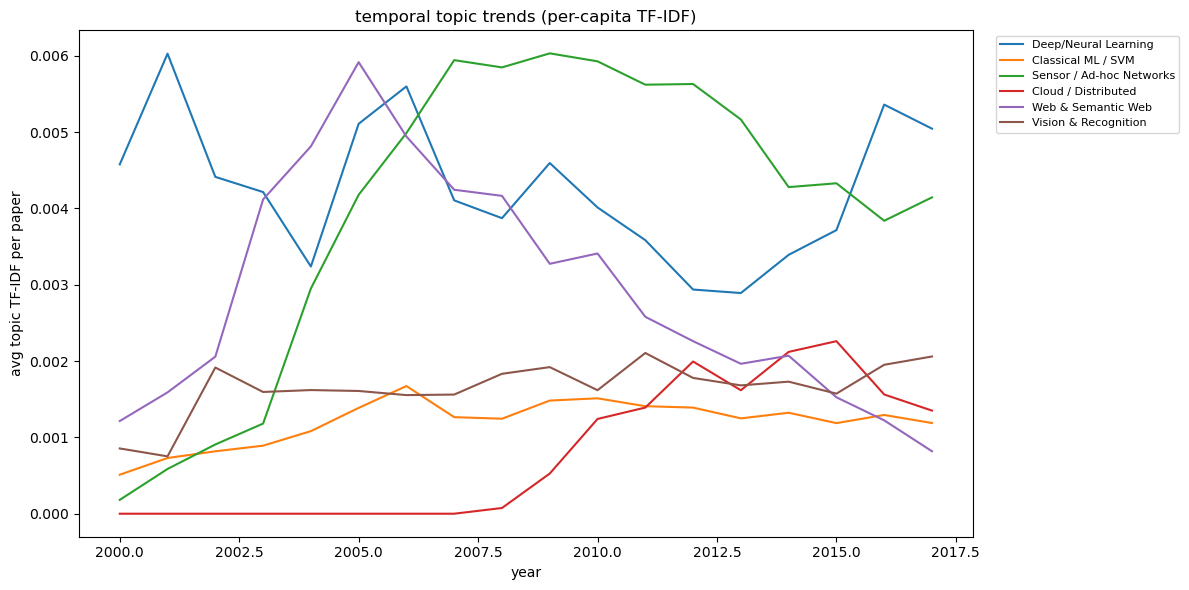

In [26]:
import matplotlib.pyplot as plt

topics_to_plot = [
    "Deep/Neural Learning",
    "Classical ML / SVM",
    "Sensor / Ad-hoc Networks",
    "Cloud / Distributed",
    "Web & Semantic Web",
    "Vision & Recognition",
]

plt.figure(figsize=(12, 6))

for topic in topics_to_plot:
    if topic in topic_pivot.columns:
        plt.plot(topic_pivot.index, topic_pivot[topic], label=topic)

plt.xlabel("year")
plt.ylabel("avg topic TF-IDF per paper")
plt.title("temporal topic trends (per-capita TF-IDF)")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=8)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd


keep_indices = [i for i, term in enumerate(terms_topics) if not term.isdigit()]

X_clean = X_topics[:, keep_indices]
terms_clean = np.array(terms_topics)[keep_indices]

print(f"removed {X_topics.shape[1] - X_clean.shape[1]} numeric/year features.")
print(f"new feature count: {X_clean.shape[1]}")


y_era = (sample_year >= 2012).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, 
    y_era, 
    test_size=0.2, 
    random_state=2253221
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\naccuracy:", accuracy_score(y_test, y_pred))

print("\n--- log reg classificatroin report---")
print(classification_report(y_test, y_pred))

coefs = clf.coef_[0]
top_positive = np.argsort(coefs)[-10:] 
top_negative = np.argsort(coefs)[:10]  

print("\n--- top words (post-2012) ---")
print(terms_clean[top_positive])

print("\n--- top words (pre-2012) ---")
print(terms_clean[top_negative])

removed 60 numeric/year features.
new feature count: 4940

accuracy: 0.7095

--- log reg classificatroin report---
              precision    recall  f1-score   support

           0       0.73      0.85      0.78     24596
           1       0.67      0.49      0.57     15404

    accuracy                           0.71     40000
   macro avg       0.70      0.67      0.67     40000
weighted avg       0.70      0.71      0.70     40000


--- top words (post-2012) ---
['deep' 'social media' 'state art' 'big' 'smartphone' 'iot' 'analytics'
 'cloud' 'sdn' 'big data']

--- top words (pre-2012) ---
['spl' 'cdma' 'sup' 'atm' 'mpeg' 'described' 'abstract' 'sensor networks'
 'computers' 'vlsi']


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

############c ase study identifier

indices_all = np.arange(len(sample_year))
_, indices_test, _, _ = train_test_split(
    indices_all, 
    y_era, 
    test_size=0.2, 
    random_state=2253221 
)

fp_mask = (y_test == 0) & (y_pred == 1)
fp_indices_local = np.where(fp_mask)[0]

print(f"Total False Positives available to inspect: {len(fp_indices_local)}")

if len(fp_indices_local) > 0:
    local_idx = np.random.choice(fp_indices_local)
    
    #map back to original dataframe index
    original_idx = indices_test[local_idx]
    
    print(f"\n--- randomly sel FP---")
    print(f"OG row index: {original_idx}")
    print(f"actual yr:        {sample_year[original_idx]} (Pre-2012)")
    
    #try block handles if sample_text is a series, except if numpy array
    try:
        text_content = sample_text.iloc[original_idx]
    except:
        text_content = sample_text[original_idx]
        
    print(f"\n--- abstract ---\n{text_content}")
    
    suspicious_words = ['cloud', 'deep', 'social', 'smart', 'big', 'analytics', 
                        'network', 'data', 'mobile', 'web']
    
    found_triggers = [w for w in suspicious_words if w in text_content.lower()]
    print(f"\n--- potential triggers ---")
    print(f"The model may have been confused by: {found_triggers}")

Total False Positives available to inspect: 3793

--- randomly sel FP---
OG row index: 96370
actual yr:        2003 (Pre-2012)

--- abstract ---
study on direct perception of collision avoidance mediated by brightness differences generally, ecological approaches toward obstacle avoidance employ "optic flow" as visual information. however, it is difficult to apply those approaches to navigations of a robot in the "real world", since optic flow is obtained through a complex image processing. in this paper, we proposed a method based on brightness differentials which are obtained by a simple process. using brightness differentials as an intrinsic metrics, robots perceive "affordance" from obstacles and can avoid them with the least effort.

--- potential triggers ---
The model may have been confused by: []


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#n_jobs=-1 uses all processors to speed it up
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2253221, n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("\n--- RF results ---")
print("accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nclassification report:\n", classification_report(y_test, y_pred_rf))

acc_log = accuracy_score(y_test, y_pred) #assumes ypred from logreg
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression accuracy: {acc_log:.4f}")
print(f"Random Forest accuracy:       {acc_rf:.4f}")
print(f"difference:                   {acc_rf - acc_log:.4f}")

Training Random Forest... (this might take 1-2 minutes)

--- RANDOM FOREST RESULTS ---
Accuracy: 0.691525

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78     24596
           1       0.70      0.35      0.46     15404

    accuracy                           0.69     40000
   macro avg       0.70      0.63      0.62     40000
weighted avg       0.69      0.69      0.66     40000

Logistic Regression Accuracy: 0.7095
Random Forest Accuracy:       0.6915
Difference:                   -0.0180


# TASK #4: AUTHOR COMMUNITY CLUSTERING
Group authors into distinct research communities based on their co-authorship patterns and/or the content of their publications

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import itertools
from scipy.sparse import lil_matrix

from sklearn.cluster import AgglomerativeClustering, SpectralClustering

dblp_auth = (
    dblp
    .dropna(subset=["authors", "year", "n_citation", "text"])
    .copy()
)

dblp_auth["authors"] = dblp_auth["authors"].apply(
    lambda x: x if isinstance(x, list) else []
)

#standardizing types
dblp_auth["year"] = dblp_auth["year"].astype(int)
dblp_auth["n_citation"] = dblp_auth["n_citation"].astype(int)

print("Rows in dblp_auth:", len(dblp_auth))


Rows in dblp_auth: 2548532


In [ ]:
# ---------- per-author stats ----------

exploded = (
    dblp_auth
    .explode("authors")
    .rename(columns={"authors": "author"})
)
exploded = exploded[exploded["author"].notna() & (exploded["author"] != "")]

author_stats = (
    exploded
    .groupby("author")
    .agg(
        n_papers=("author", "size"), 
        total_citations=("n_citation", "sum"),
        first_year=("year", "min"),
        last_year=("year", "max"),
    )
)

author_stats["career_span"] = (
    author_stats["last_year"] - author_stats["first_year"] + 1
)

#distinct coauthors for each author
coauthor_sets = defaultdict(set)
for auth_list in dblp_auth["authors"]:
    for a in auth_list:
        if not a:
            continue
        coauthor_sets[a].update(x for x in auth_list if x and x != a)

author_stats["n_coauthors"] = author_stats.index.to_series().map(
    lambda a: len(coauthor_sets.get(a, set()))
)

author_counts = author_stats["n_papers"].to_dict()

author_stats


,n_papers,total_citations,first_year,last_year,career_span,n_coauthors
author,,,,,,
"""lk"" G""rler",1,50,2002,2002,1,1
(Alex) Chao-Chiang Meng,1,10,1991,1991,1,1
(TYPE=name) (SCHEME=Vancouver) Kahn Ce,20,610,1999,2016,18,35
-Jr. Paulo Drews,1,19,2013,2013,1,4
-Mali$#353,1,50,2016,2016,1,6
...,...,...,...,...,...,...
蒋清泉,1,0,2014,2014,1,4
誠寛 大野,1,0,2004,2004,1,6
賴惠玲,1,0,2015,2015,1,5


In [ ]:
# ---------- core authors ----------

MIN_PAPERS = 30
MIN_COAUTHORS = 5
MIN_CITATIONS = 5000
MIN_SPAN = 7

elite_authors = author_stats[
    (author_stats["n_papers"]       >= MIN_PAPERS) &
    (author_stats["n_coauthors"]    >= MIN_COAUTHORS) &
    (author_stats["total_citations"]>= MIN_CITATIONS) &
    (author_stats["career_span"]    >= MIN_SPAN)
]

core_authors = set(elite_authors.index)

print("Number of elite/core authors:", len(core_authors))

#only w 2 core authors, so theres a web
def filter_core(auth_list):
    cores = [a for a in auth_list if a in core_authors]
    return cores if len(cores) >= 2 else None

dblp_auth["core_authors"] = dblp_auth["authors"].apply(filter_core)
dblp_core = dblp_auth.dropna(subset=["core_authors"]).copy()

print("# of papers with >=2 core authors:", len(dblp_core))

Number of elite/core authors: 6424
# of papers with >=2 core authors: 175351


In [ ]:
# ---------- co-occurrence matrix ----------

core_authors_sorted = sorted(core_authors)
author_to_idx = {a: i for i, a in enumerate(core_authors_sorted)}
n_authors = len(core_authors_sorted)

A = lil_matrix((n_authors, n_authors), dtype=np.float32)

for auth_list in dblp_core["core_authors"]:
    idxs = [author_to_idx[a] for a in auth_list]
    for i, j in itertools.combinations(idxs, 2):
        A[i, j] += 1.0
        A[j, i] += 1.0

A.setdiag(0)
A = A.tocsr()

print("Co-occurrence matrix shape:", A.shape)

row_sums = np.array(A.sum(axis=1)).ravel()
nonzero_idx = np.where(row_sums > 0)[0]
print("Authors before:", A.shape[0], "after removing zero rows:", len(nonzero_idx))

#deleting rows AND columns for zero-E authors
A_nz = A[nonzero_idx, :][:, nonzero_idx]  # This is the key fix!
core_authors_nz = [core_authors_sorted[i] for i in nonzero_idx]
elite_stats_nz = elite_authors.loc[core_authors_nz]

print("A_nz shape:", A_nz.shape)

Co-occurrence matrix shape: (6424, 6424)
Authors before: 6424 after removing zero rows: 6405
A_nz shape: (6405, 6405)


In [ ]:
# ---------- clustering: hierarchical + spectral ----------

n_clusters = 8 #arbitrary

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric="cosine",
    linkage="average",
)

labels_hier = agg.fit_predict(A_nz.toarray())  

spec = SpectralClustering(
    n_clusters=n_clusters,
    affinity="nearest_neighbors", 
    n_neighbors=10,
    random_state=2253221,
    assign_labels="kmeans",
)

labels_spec = spec.fit_predict(A_nz)

print("len(core_authors_nz):", len(core_authors_nz))
print("len(labels_hier):", len(labels_hier))
print("len(labels_spec):", len(labels_spec))

author_clusters = pd.DataFrame({
    "author": core_authors_nz,
    "n_papers": elite_stats_nz["n_papers"].values,
    "total_citations": elite_stats_nz["total_citations"].values,
    "career_span": elite_stats_nz["career_span"].values,
    "n_coauthors": elite_stats_nz["n_coauthors"].values,
    "cluster_hier": labels_hier,
    "cluster_spec": labels_spec,
})

author_clusters.head()


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_spectral.py:706: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


len(core_authors_nz): 6405
len(labels_hier): 6405
len(labels_spec): 6405


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,author,n_papers,total_citations,career_span,n_coauthors,cluster_hier,cluster_spec
0,A. Ardeshir Goshtasby,54,6133,31,42,0,0
1,A. Del Bimbo,142,6981,30,76,0,0
2,A. E. Eiben,101,5152,24,98,0,0
3,A. K. Qin,47,6822,14,77,0,0
4,A. Murat Tekalp,110,6125,27,107,0,0


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=2: silhouette=0.0000


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=3: silhouette=0.0001


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=5: silhouette=0.0003


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=6: silhouette=0.0004


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=8: silhouette=0.0005


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=10: silhouette=0.0005


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=12: silhouette=0.0006


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=15: silhouette=0.0008


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=18: silhouette=0.0009


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=20: silhouette=0.0009


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=25: silhouette=0.0012


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=30: silhouette=0.0013


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=40: silhouette=0.0016


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=50: silhouette=0.0018


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=75: silhouette=0.0023


c:\Users\Constance\anaconda3\envs\sklearn-env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


k=100: silhouette=0.0032


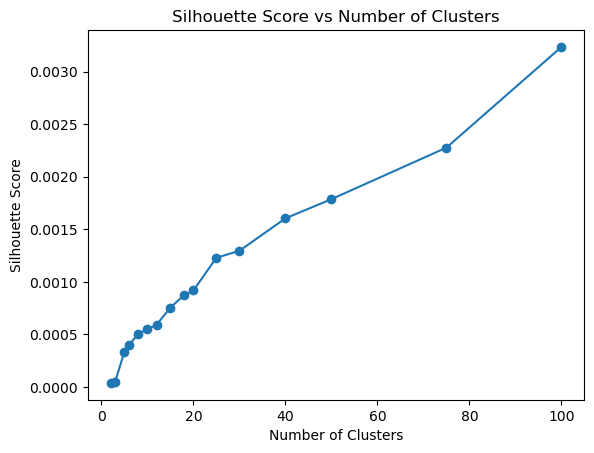

Best k by silhouette score: 100


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

A_dense = A_nz.toarray() if hasattr(A_nz, 'toarray') else A_nz
max_val = A_dense.max()
A_dist = max_val - A_dense  

np.fill_diagonal(A_dist, 0)

silhouette_scores = []
k_values = [2, 3, 5, 6, 8, 10, 12, 15, 18, 20, 25, 30, 40, 50, 75, 100]

for k in k_values:
    spec = SpectralClustering(
        n_clusters=k,
        affinity="precomputed",
        random_state=42,
        assign_labels="kmeans",
    )
    labels = spec.fit_predict(A_nz)
    sil_score = silhouette_score(A_dist, labels, metric='precomputed')
    silhouette_scores.append(sil_score)
    print(f"k={k}: silhouette={sil_score:.4f}")

# Plot the results
import matplotlib.pyplot as plt
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the best k
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k by silhouette score: {best_k}")

In [ ]:
topic_terms = {
    "Deep/Neural Learning": [
        "deep learning", "neural network", "convolutional neural", "recurrent neural",
    ],
    "Classical ML / SVM": [
        "support vector machine", "svm", "kernel method", "naive bayes",
    ],
    "Vision & Recognition": [
        "image segmentation", "object detection", "computer vision",
    ],
    "Web & Semantic Web": [
        "semantic web", "ontology", "linked data", "web service",
    ],
    "Sensor / Ad-hoc Networks": [
        "sensor network", "wireless sensor", "ad hoc network",
    ],
    "Cloud / Distributed": [
        "cloud computing", "distributed system", "mapreduce",
    ],
    "Security & Crypto": [
        "intrusion detection", "cryptographic", "access control",
    ],
    "Data Mining & Recommenders": [
        "data mining", "recommendation system", "recommender system",
    ],
    "Optimization / RL": [
        "reinforcement learning", "stochastic optimization",
    ],
    "Time Series & Forecasting": [
        "time series", "forecasting", "temporal sequence",
    ],
    "AI Alignment / Safety": [
        "ai safety", "robustness", "fairness", "bias mitigation",
    ],
    "NLP / Text": [
        "natural language processing", "language model", "text mining",
    ],
}


In [ ]:
# ---------- map authors to their papers ----------

author_to_papers = {a: set() for a in core_authors_nz}

for idx, auth_list in dblp_core["core_authors"].items():
    for a in auth_list:
        if a in author_to_papers:
            author_to_papers[a].add(idx)

# convenient access to text for those papers
paper_text = dblp_core["text"].astype(str)
paper_text_lower = paper_text.str.lower()


In [ ]:
import re

def topic_profile_for_cluster(cluster_col, cluster_id):
    cluster_authors = author_clusters.loc[
        author_clusters[cluster_col] == cluster_id, "author"
    ].tolist()
    
    #all papers written by these authors
    paper_ids = set()
    for a in cluster_authors:
        paper_ids |= author_to_papers.get(a, set())
    
    if not paper_ids:
        return None, 0, cluster_authors
    
    texts = paper_text_lower.loc[list(paper_ids)].tolist()
    n_docs = len(texts)
    
    topic_scores = {}
    for topic, phrases in topic_terms.items():
        phrases_lower = [p.lower() for p in phrases]
        hits = 0
        for t in texts:
            if any(p in t for p in phrases_lower):
                hits += 1
        topic_scores[topic] = hits / n_docs  #fraction of docs mentioning topic
    
    sorted_topics = sorted(topic_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_topics, n_docs, cluster_authors


In [39]:
# ---------- cluster summaries: hierarchical ----------

cluster_summaries_hier = []

for c in sorted(author_clusters["cluster_hier"].unique()):
    topic_list, n_docs, cluster_authors = topic_profile_for_cluster("cluster_hier", c)
    if topic_list is None:
        continue
    top3 = topic_list[:3]
    cluster_summaries_hier.append({
        "cluster_hier": c,
        "n_authors": len(cluster_authors),
        "n_papers": n_docs,
        "top_topics": [t for t, score in top3],
        "top_topic_scores": [float(score) for t, score in top3],
    })

cluster_summaries_hier_df = pd.DataFrame(cluster_summaries_hier)
cluster_summaries_hier_df


,cluster_hier,n_authors,n_papers,top_topics,top_topic_scores
0,0,6397,175347,"[Sensor / Ad-hoc Networks, AI Alignment / Safe...","[0.042030944356048296, 0.032917586271792504, 0..."
1,1,2,7,"[Deep/Neural Learning, Classical ML / SVM, Vis...","[0.0, 0.0, 0.0]"
2,2,1,26,"[Deep/Neural Learning, Classical ML / SVM, Opt...","[0.11538461538461539, 0.038461538461538464, 0...."
3,3,1,4,"[Deep/Neural Learning, Classical ML / SVM, Vis...","[0.0, 0.0, 0.0]"
4,4,1,1,"[Deep/Neural Learning, Classical ML / SVM, Vis...","[0.0, 0.0, 0.0]"
5,5,1,4,"[Deep/Neural Learning, Classical ML / SVM, Vis...","[0.0, 0.0, 0.0]"
6,6,1,8,"[Deep/Neural Learning, Classical ML / SVM, Vis...","[0.25, 0.0, 0.0]"
7,7,1,51,"[Web & Semantic Web, Deep/Neural Learning, Cla...","[0.0784313725490196, 0.0, 0.0]"


In [ ]:
# ---------- cluster summaries: spectral ----------

cluster_summaries_spec = []

for c in sorted(author_clusters["cluster_spec"].unique()):
    topic_list, n_docs, cluster_authors = topic_profile_for_cluster("cluster_spec", c)
    if topic_list is None:
        continue
    top3 = topic_list[:3]
    cluster_summaries_spec.append({
        "cluster_spec": c,
        "n_authors": len(cluster_authors),
        "n_papers": n_docs,
        "top_topics": [t for t, score in top3],
        "top_topic_scores": [float(score) for t, score in top3],
    })

cluster_summaries_spec_df = pd.DataFrame(cluster_summaries_spec)
cluster_summaries_spec_df


,cluster_spec,n_authors,n_papers,top_topics,top_topic_scores
0,0,6282,173724,"[Sensor / Ad-hoc Networks, AI Alignment / Safe...","[0.042107020331099906, 0.03289125279178467, 0...."
1,1,11,452,"[Vision & Recognition, AI Alignment / Safety, ...","[0.04424778761061947, 0.0420353982300885, 0.02..."
2,2,16,290,"[Web & Semantic Web, NLP / Text, Data Mining &...","[0.1482758620689655, 0.05517241379310345, 0.02..."
3,3,13,1310,"[Sensor / Ad-hoc Networks, Security & Crypto, ...","[0.1480916030534351, 0.08396946564885496, 0.04..."
4,4,10,275,"[AI Alignment / Safety, Deep/Neural Learning, ...","[0.02909090909090909, 0.007272727272727273, 0.0]"
5,5,19,604,"[Classical ML / SVM, Deep/Neural Learning, Opt...","[0.1837748344370861, 0.06291390728476821, 0.05..."
6,6,25,3633,"[Data Mining & Recommenders, Sensor / Ad-hoc N...","[0.08835672997522709, 0.037985136251032205, 0...."
7,7,29,1544,"[Cloud / Distributed, Sensor / Ad-hoc Networks...","[0.048575129533678756, 0.04145077720207254, 0...."


**analysis:** it seems that most authors are part of one large, inter-connected research community, and that a handful are in small, more isolated communities.